## Cleaning Train and Test files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

df = df.reindex(sorted(df.columns), axis=1)
df_test = df_test.reindex(sorted(df_test.columns), axis=1)

df.columns = df.columns.str.lower()
df_test.columns = df_test.columns.str.lower()

df.columns = [col.replace(' ', '_') for col in df.columns]
df_test.columns = [col.replace(' ', '_') for col in df_test.columns]

df.head()

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_exposure,bsmt_full_bath,bsmt_half_bath,bsmt_qual,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmtfin_type_1,bsmtfin_type_2,central_air,condition_1,condition_2,electrical,enclosed_porch,exter_cond,exter_qual,exterior_1st,exterior_2nd,fence,fireplace_qu,fireplaces,foundation,full_bath,functional,garage_area,garage_cars,garage_cond,garage_finish,garage_qual,garage_type,garage_yr_blt,gr_liv_area,half_bath,heating,heating_qc,house_style,id,kitchen_abvgr,kitchen_qual,land_contour,land_slope,lot_area,lot_config,lot_frontage,lot_shape,low_qual_fin_sf,ms_subclass,ms_zoning,mas_vnr_area,mas_vnr_type,misc_feature,misc_val,mo_sold,neighborhood,open_porch_sf,overall_cond,overall_qual,pid,paved_drive,pool_area,pool_qc,roof_matl,roof_style,sale_type,saleprice,screen_porch,street,totrms_abvgrd,total_bsmt_sf,utilities,wood_deck_sf,year_built,year_remod/add,yr_sold
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,TA,192.0,533.0,0.0,GLQ,Unf,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,NaN,NaN,0,CBlock,2,Typ,475.0,2.0,TA,RFn,TA,Attchd,1976.0,1479,1,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,CulDSac,NaN,IR1,0,60,RL,289.0,BrkFace,NaN,0,3,Sawyer,44,8,6,533352170,Y,0,NaN,CompShg,Gable,WD,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,Gd,276.0,637.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,559.0,2.0,TA,RFn,TA,Attchd,1997.0,2122,1,GasA,Ex,2Story,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,NaN,0,4,SawyerW,74,5,7,531379050,Y,0,NaN,CompShg,Gable,WD,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,TA,326.0,731.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,NaN,NaN,0,CBlock,1,Typ,246.0,1.0,TA,Unf,TA,Detchd,1953.0,1057,0,GasA,TA,1Story,153,1,Gd,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,NaN,0,1,NAmes,52,7,5,535304180,Y,0,NaN,CompShg,Gable,WD,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,Gd,384.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1444,1,GasA,Gd,2Story,318,1,TA,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,NaN,0,4,Timber,0,5,5,916386060,Y,0,NaN,CompShg,Gable,WD,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,Fa,676.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Plywood,NaN,NaN,0,PConc,2,Typ,484.0,2.0,TA,Unf,TA,Detchd,1957.0,1445,0,GasA,TA,1.5Fin,255,1,TA,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,NaN,0,3,SawyerW,59,8,6,906425045,N,0,NaN,CompShg,Gable,WD,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010


In [3]:
df.select_dtypes(include=['object']).dtypes

alley             object
bldg_type         object
bsmt_cond         object
bsmt_exposure     object
bsmt_qual         object
bsmtfin_type_1    object
bsmtfin_type_2    object
central_air       object
condition_1       object
condition_2       object
electrical        object
exter_cond        object
exter_qual        object
exterior_1st      object
exterior_2nd      object
fence             object
fireplace_qu      object
foundation        object
functional        object
garage_cond       object
garage_finish     object
garage_qual       object
garage_type       object
heating           object
heating_qc        object
house_style       object
kitchen_qual      object
land_contour      object
land_slope        object
lot_config        object
lot_shape         object
ms_zoning         object
mas_vnr_type      object
misc_feature      object
neighborhood      object
paved_drive       object
pool_qc           object
roof_matl         object
roof_style        object
sale_type         object


In [4]:
df.dropna(how = 'all') #attempted to drop rows with no values.
df_test.dropna(how = 'all')
df.shape #there were no such rows

(2051, 81)

In [5]:
#shows how many cells per column have missing values
df.isnull().sum().sort_values(ascending=False)

pool_qc            2042
misc_feature       1986
alley              1911
fence              1651
fireplace_qu       1000
lot_frontage        330
garage_qual         114
garage_finish       114
garage_cond         114
garage_yr_blt       114
garage_type         113
bsmt_exposure        58
bsmtfin_type_2       56
bsmtfin_type_1       55
bsmt_cond            55
bsmt_qual            55
mas_vnr_type         22
mas_vnr_area         22
bsmt_full_bath        2
bsmt_half_bath        2
bsmt_unf_sf           1
garage_cars           1
garage_area           1
bsmtfin_sf_2          1
bsmtfin_sf_1          1
total_bsmt_sf         1
mo_sold               0
low_qual_fin_sf       0
open_porch_sf         0
overall_cond          0
misc_val              0
overall_qual          0
year_remod/add        0
ms_zoning             0
ms_subclass           0
neighborhood          0
pool_area             0
pid                   0
paved_drive           0
year_built            0
wood_deck_sf          0
lot_shape       

Now I'll go through these columns to determine what the missing values mean. I will change 'NA' to the appropriate values based on the data dictionary.

In [6]:
#Replacing null values will appropropriate text/values. All of the ones below make sense to replace with 'None'
df['pool_qc'].replace(to_replace = np.nan, value = 'None', inplace=True)
df['fence'].replace(to_replace = np.nan, value = 'None', inplace=True)
df['misc_feature'].replace(to_replace = np.nan, value = 'None', inplace=True)
df['alley'].replace(to_replace = np.nan, value = 'None', inplace=True)
df['fireplace_qu'].replace(to_replace = np.nan, value = 'None', inplace=True)

#Missing Garage values mean there is no Garage.
df['garage_cond'].replace(to_replace = np.nan, value = 'None', inplace=True)
df['garage_yr_blt'].replace(to_replace = np.nan, value = '0', inplace=True)
df['garage_finish'].replace(to_replace = np.nan, value = 'None', inplace=True)
df['garage_qual'].replace(to_replace = np.nan, value = 'None', inplace=True)
df['garage_type'].replace(to_replace = np.nan, value = 'None', inplace=True)

#Missing BSMT values mean there is No Basement.
df['bsmt_exposure'].replace(to_replace = np.nan, value = 'None', inplace=True)
df['bsmtfin_type_2'].replace(to_replace = np.nan, value = 'None', inplace=True)
df['bsmt_qual'].replace(to_replace = np.nan, value = 'None', inplace=True)
df['bsmt_cond'].replace(to_replace = np.nan, value = 'None', inplace=True)
df['bsmtfin_type_1'].replace(to_replace = np.nan, value = 'None', inplace=True)
df['bsmt_full_bath'].replace(to_replace = np.nan, value = '0', inplace=True) #Because these are floats, these will be replaced with 0 instead of None.
df['bsmt_half_bath'].replace(to_replace = np.nan, value = '0', inplace=True) #Because these are floats, these will be replaced with 0 instead of None.

#22 rows missing Mas Vnr Type and Mas Vnr Area. Looking at this, if we put None in Type, then 0 will go in for Area.
df['mas_vnr_type'].replace(to_replace = np.nan, value = 'None', inplace=True)
df['mas_vnr_area'].replace(to_replace = np.nan, value = '0', inplace=True)

df.head()

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_exposure,bsmt_full_bath,bsmt_half_bath,bsmt_qual,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmtfin_type_1,bsmtfin_type_2,central_air,condition_1,condition_2,electrical,enclosed_porch,exter_cond,exter_qual,exterior_1st,exterior_2nd,fence,fireplace_qu,fireplaces,foundation,full_bath,functional,garage_area,garage_cars,garage_cond,garage_finish,garage_qual,garage_type,garage_yr_blt,gr_liv_area,half_bath,heating,heating_qc,house_style,id,kitchen_abvgr,kitchen_qual,land_contour,land_slope,lot_area,lot_config,lot_frontage,lot_shape,low_qual_fin_sf,ms_subclass,ms_zoning,mas_vnr_area,mas_vnr_type,misc_feature,misc_val,mo_sold,neighborhood,open_porch_sf,overall_cond,overall_qual,pid,paved_drive,pool_area,pool_qc,roof_matl,roof_style,sale_type,saleprice,screen_porch,street,totrms_abvgrd,total_bsmt_sf,utilities,wood_deck_sf,year_built,year_remod/add,yr_sold
0,725,754,0,None,3,1Fam,TA,No,0.0,0.0,TA,192.0,533.0,0.0,GLQ,Unf,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,None,None,0,CBlock,2,Typ,475.0,2.0,TA,RFn,TA,Attchd,1976.0,1479,1,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,CulDSac,NaN,IR1,0,60,RL,289.0,BrkFace,None,0,3,Sawyer,44,8,6,533352170,Y,0,None,CompShg,Gable,WD,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,None,4,1Fam,TA,No,1.0,0.0,Gd,276.0,637.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,559.0,2.0,TA,RFn,TA,Attchd,1997.0,2122,1,GasA,Ex,2Story,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,None,0,4,SawyerW,74,5,7,531379050,Y,0,None,CompShg,Gable,WD,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,None,3,1Fam,TA,No,1.0,0.0,TA,326.0,731.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,None,None,0,CBlock,1,Typ,246.0,1.0,TA,Unf,TA,Detchd,1953.0,1057,0,GasA,TA,1Story,153,1,Gd,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,None,0,1,NAmes,52,7,5,535304180,Y,0,None,CompShg,Gable,WD,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,None,3,1Fam,TA,No,0.0,0.0,Gd,384.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,None,None,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1444,1,GasA,Gd,2Story,318,1,TA,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,None,0,4,Timber,0,5,5,916386060,Y,0,None,CompShg,Gable,WD,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,None,3,1Fam,Gd,No,0.0,0.0,Fa,676.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Plywood,None,None,0,PConc,2,Typ,484.0,2.0,TA,Unf,TA,Detchd,1957.0,1445,0,GasA,TA,1.5Fin,255,1,TA,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,None,0,3,SawyerW,59,8,6,906425045,N,0,None,CompShg,Gable,WD,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010


Cleaning the test file as well.

In [7]:
#Replacing null values will appropropriate text/values. All of the ones below make sense to replace with 'None'
df_test['pool_qc'].replace(to_replace = np.nan, value = 'None', inplace=True)
df_test['fence'].replace(to_replace = np.nan, value = 'None', inplace=True)
df_test['misc_feature'].replace(to_replace = np.nan, value = 'None', inplace=True)
df_test['alley'].replace(to_replace = np.nan, value = 'None', inplace=True)
df_test['fireplace_qu'].replace(to_replace = np.nan, value = 'None', inplace=True)

#Missing Garage values mean there is no Garage.
df_test['garage_cond'].replace(to_replace = np.nan, value = 'None', inplace=True)
df_test['garage_yr_blt'].replace(to_replace = np.nan, value = '0', inplace=True)
df_test['garage_finish'].replace(to_replace = np.nan, value = 'None', inplace=True)
df_test['garage_qual'].replace(to_replace = np.nan, value = 'None', inplace=True)
df_test['garage_type'].replace(to_replace = np.nan, value = 'None', inplace=True)
df_test['garage_qual'].replace(to_replace = np.nan, value = 'TA', inplace=True) #Replacing with the median value

#Missing BSMT values mean there is No Basement.
df_test['bsmt_exposure'].replace(to_replace = np.nan, value = 'None', inplace=True)
df_test['bsmtfin_type_2'].replace(to_replace = np.nan, value = 'None', inplace=True)
df_test['bsmt_qual'].replace(to_replace = np.nan, value = 'None', inplace=True)
df_test['bsmt_cond'].replace(to_replace = np.nan, value = 'None', inplace=True)
df_test['bsmtfin_type_1'].replace(to_replace = np.nan, value = 'None', inplace=True)
df_test['bsmt_full_bath'].replace(to_replace = np.nan, value = '0', inplace=True) #Because these are floats, these will be replaced with 0 instead of None.
df_test['bsmt_half_bath'].replace(to_replace = np.nan, value = '0', inplace=True) #Because these are floats, these will be replaced with 0 instead of None.

#22 rows missing Mas Vnr Type and Mas Vnr Area. Looking at this, if we put None in Type, then 0 will go in for Area.
df_test['mas_vnr_type'].replace(to_replace = np.nan, value = 'None', inplace=True)
df_test['mas_vnr_area'].replace(to_replace = np.nan, value = '0', inplace=True)

In [8]:
df_test['garage_qual'].unique()

array(['Po', 'TA', 'Fa', 'None', 'Gd'], dtype=object)

In [9]:
#Going to look at the values in Garage Cars, Total Bsmt SF, Bsmt Unf SF, etc. to see what value is causing a null type to come back. 
df['garage_cars'].sort_values()

579     0.0
951     0.0
1754    0.0
356     0.0
959     0.0
       ... 
289     4.0
332     4.0
337     4.0
925     5.0
1712    NaN
Name: garage_cars, Length: 2051, dtype: float64

The one row with NaN shows a deteached garage but no other information. 

In [10]:
df.iloc[[1712]]

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_exposure,bsmt_full_bath,bsmt_half_bath,bsmt_qual,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmtfin_type_1,bsmtfin_type_2,central_air,condition_1,condition_2,electrical,enclosed_porch,exter_cond,exter_qual,exterior_1st,exterior_2nd,fence,fireplace_qu,fireplaces,foundation,full_bath,functional,garage_area,garage_cars,garage_cond,garage_finish,garage_qual,garage_type,garage_yr_blt,gr_liv_area,half_bath,heating,heating_qc,house_style,id,kitchen_abvgr,kitchen_qual,land_contour,land_slope,lot_area,lot_config,lot_frontage,lot_shape,low_qual_fin_sf,ms_subclass,ms_zoning,mas_vnr_area,mas_vnr_type,misc_feature,misc_val,mo_sold,neighborhood,open_porch_sf,overall_cond,overall_qual,pid,paved_drive,pool_area,pool_qc,roof_matl,roof_style,sale_type,saleprice,screen_porch,street,totrms_abvgrd,total_bsmt_sf,utilities,wood_deck_sf,year_built,year_remod/add,yr_sold
1712,942,886,0,None,3,1Fam,TA,No,0.0,0.0,Gd,311.0,548.0,0.0,ALQ,Unf,Y,Norm,Norm,SBrkr,212,TA,TA,Wd Sdng,Plywood,MnPrv,None,0,BrkTil,2,Typ,NaN,NaN,None,None,None,Detchd,0,1828,0,GasA,Ex,2Story,2237,1,Gd,Lvl,Gtl,9060,Inside,50.0,Reg,0,70,RM,0.0,None,None,0,3,IDOTRR,0,6,5,910201180,Y,0,None,CompShg,Gable,WD,150909,0,Pave,6,859.0,AllPub,174,1923,1999,2007


Filling in the one missing value with the Median since according to the data there is a detached garage.

In [11]:
df['garage_area'].fillna(df['garage_area'].median(), inplace = True)
df['garage_cars'].fillna(df['garage_cars'].median(), inplace = True)

#Doing this to the test file as well. 
df_test['garage_area'].fillna(df_test['garage_area'].median(), inplace = True)
df_test['garage_cars'].fillna(df_test['garage_cars'].median(), inplace = True)

In [12]:
df['bsmt_unf_sf'].sort_values()

1157       0.0
1466       0.0
891        0.0
1211       0.0
636        0.0
         ...  
1639    2121.0
1561    2140.0
1835    2153.0
199     2336.0
1327       NaN
Name: bsmt_unf_sf, Length: 2051, dtype: float64

In [13]:
df.iloc[[1327]]

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_exposure,bsmt_full_bath,bsmt_half_bath,bsmt_qual,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmtfin_type_1,bsmtfin_type_2,central_air,condition_1,condition_2,electrical,enclosed_porch,exter_cond,exter_qual,exterior_1st,exterior_2nd,fence,fireplace_qu,fireplaces,foundation,full_bath,functional,garage_area,garage_cars,garage_cond,garage_finish,garage_qual,garage_type,garage_yr_blt,gr_liv_area,half_bath,heating,heating_qc,house_style,id,kitchen_abvgr,kitchen_qual,land_contour,land_slope,lot_area,lot_config,lot_frontage,lot_shape,low_qual_fin_sf,ms_subclass,ms_zoning,mas_vnr_area,mas_vnr_type,misc_feature,misc_val,mo_sold,neighborhood,open_porch_sf,overall_cond,overall_qual,pid,paved_drive,pool_area,pool_qc,roof_matl,roof_style,sale_type,saleprice,screen_porch,street,totrms_abvgrd,total_bsmt_sf,utilities,wood_deck_sf,year_built,year_remod/add,yr_sold
1327,896,0,0,None,2,1Fam,None,None,0,0,None,NaN,NaN,NaN,None,None,Y,Feedr,Norm,FuseA,0,TA,TA,MetalSd,CBlock,MnPrv,None,0,PConc,1,Typ,280.0,1.0,TA,Unf,TA,Detchd,1946.0,896,0,GasA,TA,1Story,1342,1,TA,Lvl,Gtl,5940,FR3,99.0,IR1,0,20,RM,0.0,None,None,0,4,BrkSide,0,7,4,903230120,Y,0,None,CompShg,Gable,ConLD,79000,0,Pave,4,NaN,AllPub,0,1946,1950,2008


The one row of missing data is missing data for all bsmt information. Would make sense to put in None or 0 for those values. 

In [14]:
df['bsmt_unf_sf'].replace(to_replace = np.nan, value = '0', inplace=True)
df['bsmtfin_sf_1'].replace(to_replace = np.nan, value = '0', inplace=True)
df['bsmtfin_sf_2'].replace(to_replace = np.nan, value = '0', inplace=True)
df['total_bsmt_sf'].replace(to_replace = np.nan, value = '0', inplace=True)

#Doing this to the test file as well. 
df_test['bsmt_unf_sf'].replace(to_replace = np.nan, value = '0', inplace=True)
df_test['bsmtfin_sf_1'].replace(to_replace = np.nan, value = '0', inplace=True)
df_test['bsmtfin_sf_2'].replace(to_replace = np.nan, value = '0', inplace=True)
df_test['total_bsmt_sf'].replace(to_replace = np.nan, value = '0', inplace=True)


df.isnull().sum().sort_values(ascending=False)

lot_frontage       330
1st_flr_sf           0
low_qual_fin_sf      0
mo_sold              0
misc_val             0
misc_feature         0
mas_vnr_type         0
mas_vnr_area         0
ms_zoning            0
ms_subclass          0
lot_shape            0
heating_qc           0
lot_config           0
lot_area             0
land_slope           0
land_contour         0
kitchen_qual         0
kitchen_abvgr        0
id                   0
neighborhood         0
open_porch_sf        0
overall_cond         0
screen_porch         0
year_remod/add       0
year_built           0
wood_deck_sf         0
utilities            0
total_bsmt_sf        0
totrms_abvgrd        0
street               0
saleprice            0
overall_qual         0
sale_type            0
roof_style           0
roof_matl            0
pool_qc              0
pool_area            0
paved_drive          0
pid                  0
house_style          0
heating              0
2nd_flr_sf           0
half_bath            0
condition_2

At this point, all of the missing data has been filled in except for the Lot Frontage.

<AxesSubplot:>

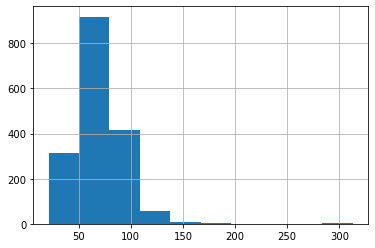

In [15]:
df['lot_frontage'].hist()

In terms of Lot Frontage, the Iowa City legal website defines lot front age as "LOT FRONTAGE: The continuous width of a lot measured along the street right of way line." With the following picture.

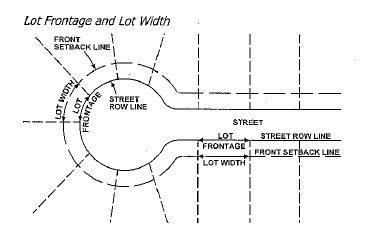 ([*source*](https://codelibrary.amlegal.com/codes/iowacityia/latest/iowacity_ia/0-0-0-25787))

This means that if a house is on a culdesac the lot frontage may be slightly smaller than the lot width. However, lot width is not given to us. 

Looking at the histogram above, the Lot Frontage is right skewed. I am going to impute the median value as this is a better measure than mean. 

In [16]:
df['lot_frontage'].replace(to_replace = np.nan, value = df['lot_frontage'].median(), inplace=True)

In [17]:
df.isnull().sum().sort_values(ascending = False)

1st_flr_sf         0
heating_qc         0
mo_sold            0
misc_val           0
misc_feature       0
mas_vnr_type       0
mas_vnr_area       0
ms_zoning          0
ms_subclass        0
low_qual_fin_sf    0
lot_shape          0
lot_frontage       0
lot_config         0
lot_area           0
land_slope         0
land_contour       0
kitchen_qual       0
kitchen_abvgr      0
id                 0
neighborhood       0
open_porch_sf      0
overall_cond       0
screen_porch       0
year_remod/add     0
year_built         0
wood_deck_sf       0
utilities          0
total_bsmt_sf      0
totrms_abvgrd      0
street             0
saleprice          0
overall_qual       0
sale_type          0
roof_style         0
roof_matl          0
pool_qc            0
pool_area          0
paved_drive        0
pid                0
house_style        0
heating            0
2nd_flr_sf         0
half_bath          0
condition_2        0
condition_1        0
central_air        0
bsmtfin_type_2     0
bsmtfin_type_

In [18]:
df.dtypes

1st_flr_sf           int64
2nd_flr_sf           int64
3ssn_porch           int64
alley               object
bedroom_abvgr        int64
bldg_type           object
bsmt_cond           object
bsmt_exposure       object
bsmt_full_bath      object
bsmt_half_bath      object
bsmt_qual           object
bsmt_unf_sf         object
bsmtfin_sf_1        object
bsmtfin_sf_2        object
bsmtfin_type_1      object
bsmtfin_type_2      object
central_air         object
condition_1         object
condition_2         object
electrical          object
enclosed_porch       int64
exter_cond          object
exter_qual          object
exterior_1st        object
exterior_2nd        object
fence               object
fireplace_qu        object
fireplaces           int64
foundation          object
full_bath            int64
functional          object
garage_area        float64
garage_cars        float64
garage_cond         object
garage_finish       object
garage_qual         object
garage_type         object
g

What to make a function to look for through all columns and find data types that are objects and if they are ratings such as excellent, through poor to change them to numerical values. ([*source*](https://www.geeksforgeeks.org/numpy-all-in-python/))

In [19]:
def ratings_to_num(dataframe):
    for column in dataframe:
        if df[column].dtype == object:
            if all(x in df[column].value_counts().index for x in ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None']) == True:
                 df[column] = df[column].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'None':0}).astype(int)
                    
            elif all(x in df[column].value_counts().index for x in['Ex', 'Gd', 'TA', 'Fa', 'Po']) == True:
                df[column] = df[column].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1}).astype(int)
            
            elif all(x in df[column].value_counts().index for x in['Ex', 'Gd', 'TA', 'Fa', 'None']) == True:
                df[column] = df[column].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'None':1}).astype(int)
                
            elif all(x in df[column].value_counts().index for x in['Ex', 'Gd', 'TA', 'Fa']) == True:
                df[column] = df[column].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2}).astype(int)
                
            elif all(x in df[column].value_counts().index for x in['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal']) == True:
                df[column] = df[column].map({'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod':4, 'Maj1': 3, 'Maj2':2, 'Sev':1, 'Sal':0}).astype(int)


In [20]:
def ratings_to_num_test(dataframe):
    for column in dataframe:
        if df_test[column].dtype == object:
            if all(x in df_test[column].value_counts().index for x in ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None']) == True:
                 df_test[column] = df_test[column].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'None':0}).astype(int)
                    
            elif all(x in df_test[column].value_counts().index for x in['Ex', 'Gd', 'TA', 'Fa', 'Po']) == True:
                df_test[column] = df_test[column].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1}).astype(int)
            
            elif all(x in df_test[column].value_counts().index for x in['Ex', 'Gd', 'TA', 'Fa', 'None']) == True:
                df_test[column] = df_test[column].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'None':1}).astype(int)
                
            elif all(x in df_test[column].value_counts().index for x in['Ex', 'TA', 'None']) == True:
                df_test[column] = df_test[column].map({'Ex': 5, 'TA': 3, 'None':1}).astype(int)
                
            elif all(x in df_test[column].value_counts().index for x in['Ex', 'Gd', 'TA', 'Fa']) == True:
                df_test[column] = df_test[column].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2}).astype(int)
                
            elif all(x in df_test[column].value_counts().index for x in['Gd', 'TA', 'Fa', 'None']) == True:
                df_test[column] = df_test[column].map({'Gd':4, 'TA': 3, 'Fa':2, 'None':1})#.astype(int)
                
            elif all(x in df_test[column].value_counts().index for x in['Gd', 'TA', 'Fa', 'Po', 'None']) == True:
                df_test[column] = df_test[column].map({'Gd':4, 'TA': 3, 'Fa':2, 'Po': 1, 'None':1})#.astype(int)
                
            elif all(x in df_test[column].value_counts().index for x in['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal']) == True:
                df_test[column] = df_test[column].map({'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod':4, 'Maj1': 3, 'Maj2':2, 'Sev':1, 'Sal':0}).astype(int)
                
            elif all(x in df_test[column].value_counts().index for x in['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2']) == True:
                df_test[column] = df_test[column].map({'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod':4, 'Maj1': 3, 'Maj2':2}).astype(int)

In [21]:
df_test['garage_qual'].unique()

array(['Po', 'TA', 'Fa', 'None', 'Gd'], dtype=object)

In [22]:
ratings_to_num(df)

ratings_to_num_test(df_test)

In [23]:
df.head()

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_exposure,bsmt_full_bath,bsmt_half_bath,bsmt_qual,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmtfin_type_1,bsmtfin_type_2,central_air,condition_1,condition_2,electrical,enclosed_porch,exter_cond,exter_qual,exterior_1st,exterior_2nd,fence,fireplace_qu,fireplaces,foundation,full_bath,functional,garage_area,garage_cars,garage_cond,garage_finish,garage_qual,garage_type,garage_yr_blt,gr_liv_area,half_bath,heating,heating_qc,house_style,id,kitchen_abvgr,kitchen_qual,land_contour,land_slope,lot_area,lot_config,lot_frontage,lot_shape,low_qual_fin_sf,ms_subclass,ms_zoning,mas_vnr_area,mas_vnr_type,misc_feature,misc_val,mo_sold,neighborhood,open_porch_sf,overall_cond,overall_qual,pid,paved_drive,pool_area,pool_qc,roof_matl,roof_style,sale_type,saleprice,screen_porch,street,totrms_abvgrd,total_bsmt_sf,utilities,wood_deck_sf,year_built,year_remod/add,yr_sold
0,725,754,0,None,3,1Fam,3,No,0.0,0.0,3,192.0,533.0,0.0,GLQ,Unf,Y,RRAe,Norm,SBrkr,0,3,4,HdBoard,Plywood,None,0,0,CBlock,2,7,475.0,2.0,3,RFn,3,Attchd,1976.0,1479,1,GasA,5,2Story,109,1,4,Lvl,Gtl,13517,CulDSac,68.0,IR1,0,60,RL,289.0,BrkFace,None,0,3,Sawyer,44,8,6,533352170,Y,0,1,CompShg,Gable,WD,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,None,4,1Fam,3,No,1.0,0.0,4,276.0,637.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,3,4,VinylSd,VinylSd,None,3,1,PConc,2,7,559.0,2.0,3,RFn,3,Attchd,1997.0,2122,1,GasA,5,2Story,544,1,4,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,None,0,4,SawyerW,74,5,7,531379050,Y,0,1,CompShg,Gable,WD,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,None,3,1Fam,3,No,1.0,0.0,3,326.0,731.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,4,3,VinylSd,VinylSd,None,0,0,CBlock,1,7,246.0,1.0,3,Unf,3,Detchd,1953.0,1057,0,GasA,3,1Story,153,1,4,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,None,0,1,NAmes,52,7,5,535304180,Y,0,1,CompShg,Gable,WD,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,None,3,1Fam,3,No,0.0,0.0,4,384.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,3,3,VinylSd,VinylSd,None,0,0,PConc,2,7,400.0,2.0,3,Fin,3,BuiltIn,2007.0,1444,1,GasA,4,2Story,318,1,3,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,None,0,4,Timber,0,5,5,916386060,Y,0,1,CompShg,Gable,WD,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,None,3,1Fam,4,No,0.0,0.0,2,676.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,3,3,Wd Sdng,Plywood,None,0,0,PConc,2,7,484.0,2.0,3,Unf,3,Detchd,1957.0,1445,0,GasA,3,1.5Fin,255,1,3,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,None,0,3,SawyerW,59,8,6,906425045,N,0,1,CompShg,Gable,WD,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010


In [24]:
df_test['garage_qual'].replace(to_replace = np.nan, value = 3, inplace = True)

It is saying that Bsmt_cond only in the df_test is an object when it is a int. Going to change that below. 

Doing to assign ordinal rankings to certain columns that are only labeled as nominal. Condition 1 and 1 are based on where the home is located, near a railroad, a major street, or parks. These will be ranked according to either good or bad conditions.

In [25]:
df['condition_1'].unique()

array(['RRAe', 'Norm', 'PosA', 'Artery', 'Feedr', 'PosN', 'RRAn', 'RRNe',
       'RRNn'], dtype=object)

In [26]:
Cond1_dict = {'Artery': 1,
              'Feedr': 1,
              'Norm': 2,
              'RRNn': 1,
              'RRAn': 1, 
              'PosN': 3,
              'PosA': 3, 
              'RRNe': 1,
              'RRAe': 1
             }

In [27]:
df['condition_1'] = df['condition_1'].map(Cond1_dict).astype(int)
df['condition_2'] = df['condition_2'].map(Cond1_dict).astype(int)

#Completing this to the test file as well. 
df_test['condition_1'] = df_test['condition_1'].map(Cond1_dict).astype(int)
df_test['condition_2'] = df_test['condition_2'].map(Cond1_dict).astype(int)


In [28]:
df.head()

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_exposure,bsmt_full_bath,bsmt_half_bath,bsmt_qual,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmtfin_type_1,bsmtfin_type_2,central_air,condition_1,condition_2,electrical,enclosed_porch,exter_cond,exter_qual,exterior_1st,exterior_2nd,fence,fireplace_qu,fireplaces,foundation,full_bath,functional,garage_area,garage_cars,garage_cond,garage_finish,garage_qual,garage_type,garage_yr_blt,gr_liv_area,half_bath,heating,heating_qc,house_style,id,kitchen_abvgr,kitchen_qual,land_contour,land_slope,lot_area,lot_config,lot_frontage,lot_shape,low_qual_fin_sf,ms_subclass,ms_zoning,mas_vnr_area,mas_vnr_type,misc_feature,misc_val,mo_sold,neighborhood,open_porch_sf,overall_cond,overall_qual,pid,paved_drive,pool_area,pool_qc,roof_matl,roof_style,sale_type,saleprice,screen_porch,street,totrms_abvgrd,total_bsmt_sf,utilities,wood_deck_sf,year_built,year_remod/add,yr_sold
0,725,754,0,None,3,1Fam,3,No,0.0,0.0,3,192.0,533.0,0.0,GLQ,Unf,Y,1,2,SBrkr,0,3,4,HdBoard,Plywood,None,0,0,CBlock,2,7,475.0,2.0,3,RFn,3,Attchd,1976.0,1479,1,GasA,5,2Story,109,1,4,Lvl,Gtl,13517,CulDSac,68.0,IR1,0,60,RL,289.0,BrkFace,None,0,3,Sawyer,44,8,6,533352170,Y,0,1,CompShg,Gable,WD,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,None,4,1Fam,3,No,1.0,0.0,4,276.0,637.0,0.0,GLQ,Unf,Y,2,2,SBrkr,0,3,4,VinylSd,VinylSd,None,3,1,PConc,2,7,559.0,2.0,3,RFn,3,Attchd,1997.0,2122,1,GasA,5,2Story,544,1,4,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,None,0,4,SawyerW,74,5,7,531379050,Y,0,1,CompShg,Gable,WD,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,None,3,1Fam,3,No,1.0,0.0,3,326.0,731.0,0.0,GLQ,Unf,Y,2,2,SBrkr,0,4,3,VinylSd,VinylSd,None,0,0,CBlock,1,7,246.0,1.0,3,Unf,3,Detchd,1953.0,1057,0,GasA,3,1Story,153,1,4,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,None,0,1,NAmes,52,7,5,535304180,Y,0,1,CompShg,Gable,WD,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,None,3,1Fam,3,No,0.0,0.0,4,384.0,0.0,0.0,Unf,Unf,Y,2,2,SBrkr,0,3,3,VinylSd,VinylSd,None,0,0,PConc,2,7,400.0,2.0,3,Fin,3,BuiltIn,2007.0,1444,1,GasA,4,2Story,318,1,3,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,None,0,4,Timber,0,5,5,916386060,Y,0,1,CompShg,Gable,WD,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,None,3,1Fam,4,No,0.0,0.0,2,676.0,0.0,0.0,Unf,Unf,Y,2,2,SBrkr,0,3,3,Wd Sdng,Plywood,None,0,0,PConc,2,7,484.0,2.0,3,Unf,3,Detchd,1957.0,1445,0,GasA,3,1.5Fin,255,1,3,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,None,0,3,SawyerW,59,8,6,906425045,N,0,1,CompShg,Gable,WD,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010


The only column left with null values is Lot Frontage. What should I impute?

<AxesSubplot:>

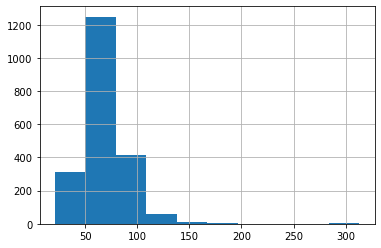

In [29]:
df['lot_frontage'].hist()

This is very skewed. Not sure what to do with it right now, so I will move onto something else. 

I want to apply a score/ranking to the neighborhoods based on overall price. Those neighborhoods with the higher average sales price will receive a higher ranking. This will avoid a dummy column and also apply the location effect. 

In [30]:
df.groupby("neighborhood")['saleprice'].mean().sort_values()

neighborhood
MeadowV    100231.250000
IDOTRR     101103.188406
BrDale     103371.052632
OldTown    125276.300613
BrkSide    127022.697368
Edwards    130493.468531
SWISU      134758.875000
Landmrk    137000.000000
Sawyer     137181.909910
NPkVill    140476.470588
Blueste    144566.666667
NAmes      145905.816129
Mitchel    167656.707317
SawyerW    187760.160920
Greens     188666.666667
Gilbert    189228.387931
NWAmes     194619.022989
Blmngtn    200417.681818
CollgCr    202497.216667
Crawfor    205901.211268
ClearCr    217490.074074
Somerst    227183.900000
Timber     241051.354167
Veenker    253570.588235
GrnHill    280000.000000
NoRidge    316294.125000
NridgHt    322831.352459
StoneBr    329675.736842
Name: saleprice, dtype: float64

In [31]:
Neighborhood_dict = {'MeadowV': 1, 
                     'IDOTRR': 2, 
                     'BrDale': 3, 
                     'OldTown': 4, 
                     'BrkSide': 5, 
                     'Edwards': 6, 
                     'SWISU': 7, 
                     'Landmrk': 8, 
                     'Sawyer': 9, 
                     'NPkVill': 10, 
                     'Blueste': 11, 
                     'NAmes': 12, 
                     'Mitchel': 13, 
                     'SawyerW': 14,
                     'Greens': 15, 
                     'Gilbert': 16, 
                     'NWAmes': 17, 
                     'Blmngtn': 18, 
                     'CollgCr': 19, 
                     'Crawfor': 20, 
                     'ClearCr': 21, 
                     'Somerst': 22,
                     'Timber': 23,
                     'Veenker': 24,
                     'GrnHill': 25,
                     'NoRidge': 26, 
                     'NridgHt': 27,
                     'StoneBr': 28
                    }

In [32]:
df['neighborhood_rank'] = df['neighborhood'].map(Neighborhood_dict)

#Complete to the test file as well.
df_test['neighborhood_rank'] = df_test['neighborhood'].map(Neighborhood_dict)

In [33]:
cols = df.columns

In [34]:
num_cols = df._get_numeric_data().columns

In [35]:
num_cols

Index(['1st_flr_sf', '2nd_flr_sf', '3ssn_porch', 'bedroom_abvgr', 'bsmt_cond',
       'bsmt_qual', 'condition_1', 'condition_2', 'enclosed_porch',
       'exter_cond', 'exter_qual', 'fireplace_qu', 'fireplaces', 'full_bath',
       'functional', 'garage_area', 'garage_cars', 'garage_cond',
       'garage_qual', 'gr_liv_area', 'half_bath', 'heating_qc', 'id',
       'kitchen_abvgr', 'kitchen_qual', 'lot_area', 'lot_frontage',
       'low_qual_fin_sf', 'ms_subclass', 'misc_val', 'mo_sold',
       'open_porch_sf', 'overall_cond', 'overall_qual', 'pid', 'pool_area',
       'pool_qc', 'saleprice', 'screen_porch', 'totrms_abvgrd', 'wood_deck_sf',
       'year_built', 'year_remod/add', 'yr_sold', 'neighborhood_rank'],
      dtype='object')

In [36]:
object_cols = list(set(cols) - set(num_cols))
object_cols

['sale_type',
 'garage_yr_blt',
 'bsmtfin_sf_1',
 'bsmtfin_type_1',
 'garage_type',
 'house_style',
 'bldg_type',
 'foundation',
 'bsmt_exposure',
 'misc_feature',
 'fence',
 'lot_config',
 'roof_style',
 'heating',
 'bsmtfin_type_2',
 'mas_vnr_type',
 'land_slope',
 'garage_finish',
 'total_bsmt_sf',
 'neighborhood',
 'bsmt_full_bath',
 'mas_vnr_area',
 'central_air',
 'land_contour',
 'street',
 'roof_matl',
 'bsmt_half_bath',
 'electrical',
 'bsmt_unf_sf',
 'utilities',
 'exterior_2nd',
 'paved_drive',
 'lot_shape',
 'bsmtfin_sf_2',
 'alley',
 'ms_zoning',
 'exterior_1st']

Some of these are not objects so I am going to change them from object to float/int. 

In [37]:
cols_object_err = ['total_bsmt_sf', 'garage_yr_blt', 'bsmt_half_bath', 'bsmtfin_sf_1', 'bsmt_full_bath', 'bsmtfin_sf_2', 'bsmt_unf_sf']
df[cols_object_err] = df[cols_object_err].apply(pd.to_numeric)

#complete to the test file as well. 
df_test[cols_object_err] = df_test[cols_object_err].apply(pd.to_numeric)

In [38]:
num_cols = df._get_numeric_data().columns
num_cols_test = df_test._get_numeric_data().columns
num_cols

Index(['1st_flr_sf', '2nd_flr_sf', '3ssn_porch', 'bedroom_abvgr', 'bsmt_cond',
       'bsmt_full_bath', 'bsmt_half_bath', 'bsmt_qual', 'bsmt_unf_sf',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'condition_1', 'condition_2',
       'enclosed_porch', 'exter_cond', 'exter_qual', 'fireplace_qu',
       'fireplaces', 'full_bath', 'functional', 'garage_area', 'garage_cars',
       'garage_cond', 'garage_qual', 'garage_yr_blt', 'gr_liv_area',
       'half_bath', 'heating_qc', 'id', 'kitchen_abvgr', 'kitchen_qual',
       'lot_area', 'lot_frontage', 'low_qual_fin_sf', 'ms_subclass',
       'misc_val', 'mo_sold', 'open_porch_sf', 'overall_cond', 'overall_qual',
       'pid', 'pool_area', 'pool_qc', 'saleprice', 'screen_porch',
       'totrms_abvgrd', 'total_bsmt_sf', 'wood_deck_sf', 'year_built',
       'year_remod/add', 'yr_sold', 'neighborhood_rank'],
      dtype='object')

Id and pid should be object columns a they are not characteristics that I am going to use as a feature. 

In [39]:
df['id'].astype(object)
df['pid'].astype(object)

df_test['id'].astype(object)
df_test['pid'].astype(object);

In [40]:
object_cols = list(set(cols) - set(num_cols))
object_cols

['sale_type',
 'bsmtfin_type_1',
 'garage_type',
 'house_style',
 'bldg_type',
 'foundation',
 'bsmt_exposure',
 'misc_feature',
 'fence',
 'lot_config',
 'roof_style',
 'heating',
 'bsmtfin_type_2',
 'mas_vnr_type',
 'land_slope',
 'garage_finish',
 'neighborhood',
 'mas_vnr_area',
 'central_air',
 'land_contour',
 'street',
 'roof_matl',
 'electrical',
 'utilities',
 'exterior_2nd',
 'paved_drive',
 'lot_shape',
 'alley',
 'ms_zoning',
 'exterior_1st']

In [41]:
df_test.head()

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_exposure,bsmt_full_bath,bsmt_half_bath,bsmt_qual,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmtfin_type_1,bsmtfin_type_2,central_air,condition_1,condition_2,electrical,enclosed_porch,exter_cond,exter_qual,exterior_1st,exterior_2nd,fence,fireplace_qu,fireplaces,foundation,full_bath,functional,garage_area,garage_cars,garage_cond,garage_finish,garage_qual,garage_type,garage_yr_blt,gr_liv_area,half_bath,heating,heating_qc,house_style,id,kitchen_abvgr,kitchen_qual,land_contour,land_slope,lot_area,lot_config,lot_frontage,lot_shape,low_qual_fin_sf,ms_subclass,ms_zoning,mas_vnr_area,mas_vnr_type,misc_feature,misc_val,mo_sold,neighborhood,open_porch_sf,overall_cond,overall_qual,pid,paved_drive,pool_area,pool_qc,roof_matl,roof_style,sale_type,screen_porch,street,totrms_abvgrd,total_bsmt_sf,utilities,wood_deck_sf,year_built,year_remod/add,yr_sold,neighborhood_rank
0,908,1020,0,Grvl,4,2fmCon,3,No,0,0,2,1020,0,0,Unf,Unf,N,2,2,FuseP,112,2,3,AsbShng,AsbShng,None,0,0,Stone,2,7,440,1,1,Unf,3.0,Detchd,1910.0,1928,0,GasA,4,2Story,2658,2,2,Lvl,Gtl,9142,Inside,69.0,Reg,0,190,RM,0.0,None,None,0,4,OldTown,60,8,6,902301120,Y,0,1,CompShg,Gable,WD,0,Pave,9,1020,AllPub,0,1910,1950,2006,4
1,1967,0,0,None,6,Duplex,3,No,0,0,4,1967,0,0,Unf,Unf,Y,2,2,SBrkr,0,3,3,Plywood,Plywood,None,0,0,CBlock,2,7,580,2,3,Fin,3.0,Attchd,1977.0,1967,0,GasA,3,1Story,2718,2,3,Lvl,Gtl,9662,Inside,NaN,IR1,0,90,RL,0.0,None,None,0,8,Sawyer,0,4,5,905108090,Y,0,1,CompShg,Gable,WD,0,Pave,10,1967,AllPub,170,1977,1977,2006,9
2,664,832,0,None,3,1Fam,4,Av,1,0,4,100,554,0,GLQ,Unf,Y,2,2,SBrkr,0,3,4,VinylSd,VinylSd,None,4,1,PConc,2,7,426,2,3,RFn,3.0,Attchd,2006.0,1496,1,GasA,5,2Story,2414,1,4,Lvl,Gtl,17104,Inside,58.0,IR1,0,60,RL,0.0,None,None,0,9,Gilbert,24,5,7,528218130,Y,0,1,CompShg,Gable,New,0,Pave,7,654,AllPub,100,2006,2006,2006,16
3,968,0,0,None,2,1Fam,3,No,0,0,3,968,0,0,Unf,Unf,Y,2,2,SBrkr,184,3,4,Wd Sdng,Wd Sdng,None,0,0,CBlock,1,7,480,2,3,Unf,2.0,Detchd,1935.0,968,0,GasA,3,1Story,1989,1,3,Lvl,Gtl,8520,Inside,60.0,Reg,0,30,RM,0.0,None,None,0,7,OldTown,0,6,5,902207150,N,0,1,CompShg,Gable,WD,0,Pave,5,968,AllPub,0,1923,2006,2007,4
4,1394,0,0,None,3,1Fam,3,No,1,0,4,785,609,0,BLQ,Unf,Y,2,2,SBrkr,0,3,3,Plywood,Plywood,None,4,2,CBlock,1,7,514,2,3,RFn,3.0,Attchd,1963.0,1394,1,GasA,4,1Story,625,1,3,Lvl,Gtl,9500,Inside,NaN,IR1,0,20,RL,247.0,BrkFace,None,0,7,NAmes,76,5,6,535105100,Y,0,1,CompShg,Gable,WD,185,Pave,6,1394,AllPub,0,1963,1963,2009,12


## Outliers

After completing an OLS model, the following data came back as outliers. Going to analyze them here. 

In [42]:
df.head()

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_exposure,bsmt_full_bath,bsmt_half_bath,bsmt_qual,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmtfin_type_1,bsmtfin_type_2,central_air,condition_1,condition_2,electrical,enclosed_porch,exter_cond,exter_qual,exterior_1st,exterior_2nd,fence,fireplace_qu,fireplaces,foundation,full_bath,functional,garage_area,garage_cars,garage_cond,garage_finish,garage_qual,garage_type,garage_yr_blt,gr_liv_area,half_bath,heating,heating_qc,house_style,id,kitchen_abvgr,kitchen_qual,land_contour,land_slope,lot_area,lot_config,lot_frontage,lot_shape,low_qual_fin_sf,ms_subclass,ms_zoning,mas_vnr_area,mas_vnr_type,misc_feature,misc_val,mo_sold,neighborhood,open_porch_sf,overall_cond,overall_qual,pid,paved_drive,pool_area,pool_qc,roof_matl,roof_style,sale_type,saleprice,screen_porch,street,totrms_abvgrd,total_bsmt_sf,utilities,wood_deck_sf,year_built,year_remod/add,yr_sold,neighborhood_rank
0,725,754,0,None,3,1Fam,3,No,0.0,0.0,3,192.0,533.0,0.0,GLQ,Unf,Y,1,2,SBrkr,0,3,4,HdBoard,Plywood,None,0,0,CBlock,2,7,475.0,2.0,3,RFn,3,Attchd,1976.0,1479,1,GasA,5,2Story,109,1,4,Lvl,Gtl,13517,CulDSac,68.0,IR1,0,60,RL,289.0,BrkFace,None,0,3,Sawyer,44,8,6,533352170,Y,0,1,CompShg,Gable,WD,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010,9
1,913,1209,0,None,4,1Fam,3,No,1.0,0.0,4,276.0,637.0,0.0,GLQ,Unf,Y,2,2,SBrkr,0,3,4,VinylSd,VinylSd,None,3,1,PConc,2,7,559.0,2.0,3,RFn,3,Attchd,1997.0,2122,1,GasA,5,2Story,544,1,4,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,None,0,4,SawyerW,74,5,7,531379050,Y,0,1,CompShg,Gable,WD,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009,14
2,1057,0,0,None,3,1Fam,3,No,1.0,0.0,3,326.0,731.0,0.0,GLQ,Unf,Y,2,2,SBrkr,0,4,3,VinylSd,VinylSd,None,0,0,CBlock,1,7,246.0,1.0,3,Unf,3,Detchd,1953.0,1057,0,GasA,3,1Story,153,1,4,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,None,0,1,NAmes,52,7,5,535304180,Y,0,1,CompShg,Gable,WD,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010,12
3,744,700,0,None,3,1Fam,3,No,0.0,0.0,4,384.0,0.0,0.0,Unf,Unf,Y,2,2,SBrkr,0,3,3,VinylSd,VinylSd,None,0,0,PConc,2,7,400.0,2.0,3,Fin,3,BuiltIn,2007.0,1444,1,GasA,4,2Story,318,1,3,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,None,0,4,Timber,0,5,5,916386060,Y,0,1,CompShg,Gable,WD,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010,23
4,831,614,0,None,3,1Fam,4,No,0.0,0.0,2,676.0,0.0,0.0,Unf,Unf,Y,2,2,SBrkr,0,3,3,Wd Sdng,Plywood,None,0,0,PConc,2,7,484.0,2.0,3,Unf,3,Detchd,1957.0,1445,0,GasA,3,1.5Fin,255,1,3,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,None,0,3,SawyerW,59,8,6,906425045,N,0,1,CompShg,Gable,WD,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010,14


In [43]:
df.iloc[[183, 407, 958, 1628, 1564]]

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_exposure,bsmt_full_bath,bsmt_half_bath,bsmt_qual,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmtfin_type_1,bsmtfin_type_2,central_air,condition_1,condition_2,electrical,enclosed_porch,exter_cond,exter_qual,exterior_1st,exterior_2nd,fence,fireplace_qu,fireplaces,foundation,full_bath,functional,garage_area,garage_cars,garage_cond,garage_finish,garage_qual,garage_type,garage_yr_blt,gr_liv_area,half_bath,heating,heating_qc,house_style,id,kitchen_abvgr,kitchen_qual,land_contour,land_slope,lot_area,lot_config,lot_frontage,lot_shape,low_qual_fin_sf,ms_subclass,ms_zoning,mas_vnr_area,mas_vnr_type,misc_feature,misc_val,mo_sold,neighborhood,open_porch_sf,overall_cond,overall_qual,pid,paved_drive,pool_area,pool_qc,roof_matl,roof_style,sale_type,saleprice,screen_porch,street,totrms_abvgrd,total_bsmt_sf,utilities,wood_deck_sf,year_built,year_remod/add,yr_sold,neighborhood_rank
183,733,0,0,None,2,1Fam,0,None,0.0,0.0,0,0.0,0.0,0.0,None,None,N,2,2,FuseA,0,1,2,AsbShng,VinylSd,None,0,0,Slab,1,0,487.0,2.0,1,Unf,2,Attchd,1952.0,733,0,Wall,1,1Story,1554,1,2,Low,Mod,14584,Inside,80.0,Reg,0,20,A (agr),0.0,None,None,0,2,IDOTRR,0,5,1,910251050,N,0,1,CompShg,Gable,WD,13100,0,Pave,4,0.0,AllPub,0,1952,1952,2008,2
407,811,576,0,None,3,2fmCon,3,No,0.0,0.0,3,811.0,0.0,0.0,Unf,Unf,Y,2,2,FuseA,0,3,3,Wd Sdng,Wd Sdng,None,0,0,CBlock,2,7,256.0,1.0,3,Unf,3,BuiltIn,1954.0,1387,0,GasA,3,1.5Fin,707,2,4,Lvl,Gtl,6000,Inside,50.0,Reg,0,190,RM,0.0,None,None,0,11,OldTown,0,4,5,902202150,Y,0,1,CompShg,Gable,WD,93000,0,Pave,7,811.0,AllPub,0,1954,1954,2009,4
958,1004,848,0,None,3,1Fam,3,Mn,0.0,0.0,4,336.0,668.0,0.0,GLQ,Unf,Y,2,2,SBrkr,0,3,4,VinylSd,VinylSd,GdPrv,3,2,PConc,2,7,660.0,3.0,3,Fin,3,Attchd,1999.0,1852,1,GasA,5,2Story,1458,1,4,Lvl,Gtl,9066,Inside,73.0,IR1,0,60,RL,320.0,BrkFace,None,0,12,CollgCr,106,5,8,907254020,Y,0,1,CompShg,Gable,WD,230000,0,Pave,7,1004.0,AllPub,224,1999,2000,2008,19
1628,832,0,0,None,2,1Fam,2,No,0.0,0.0,2,678.0,0.0,0.0,Unf,Unf,N,2,2,SBrkr,0,2,3,AsbShng,AsbShng,None,4,1,BrkTil,1,7,780.0,2.0,2,Unf,2,Detchd,1928.0,832,0,GasA,3,1Story,182,1,3,Lvl,Gtl,9656,Inside,68.0,Reg,0,30,RM,0.0,None,None,0,6,OldTown,0,2,2,902207130,N,0,1,CompShg,Gable,WD,12789,0,Pave,5,678.0,AllPub,0,1923,1970,2010,4
1564,600,368,0,None,2,1Fam,3,No,0.0,0.0,3,600.0,0.0,0.0,Unf,Unf,N,2,2,SBrkr,0,3,3,VinylSd,VinylSd,GdWo,0,0,BrkTil,1,7,0.0,0.0,0,None,0,None,0.0,968,0,Grav,2,1.5Fin,710,1,3,Lvl,Gtl,5925,Inside,50.0,Reg,0,50,RM,0.0,None,None,0,5,OldTown,0,6,3,902205030,Y,0,1,CompShg,Gable,WD,37900,0,Pave,6,600.0,AllPub,0,1910,1950,2009,4


Row 183 is agriculture. I feel that is safe to remove from the data set. The three rows of 407, 1628 and 1564 are on the smaller side for squarefootage. These seem to be older, smaller homes that were sold for higher prices that did not fall in line with the patterns of the time. Row 958 is a new build in a nicer neighbordhood but the sale price is much lowe than the neighboring homes. 

If these five rows were removed, that would account for .2% of the data. I am ok with removing them from the dataset. 

In [44]:
#df = df.drop(labels=[183, 407, 958, 1628, 1564], axis=0)

After taking these outliers out, the models performed worse. I believe this could be because it is overfitting the model to what is in my train set. Instead I will leave the outliers in the train set. 



Doing EDA and looking and scatterplots, I determined there were two outliers on the Gr Liv Area and will be removing below. 

In [45]:
df[df['gr_liv_area'] > 2627.75]['gr_liv_area'].sort_values(ascending = False)

960     5642
1885    5095
616     3820
1897    3672
1035    3608
1692    3500
1939    3493
858     3395
138     3390
823     3279
1389    3238
328     3228
1020    3222
1700    3140
1563    3086
1433    3082
465     3078
1343    2956
1170    2945
125     2944
1243    2898
186     2872
1397    2872
151     2868
1293    2840
1737    2826
1796    2822
941     2814
1004    2810
835     2799
190     2798
1263    2794
974     2792
332     2790
1605    2787
1566    2787
52      2784
1141    2775
361     2758
770     2730
99      2726
952     2726
1393    2715
509     2713
1304    2704
1592    2698
1227    2696
1401    2696
270     2690
1732    2690
222     2687
684     2687
668     2683
2041    2668
1582    2654
489     2649
761     2646
1201    2646
1835    2643
1965    2640
1618    2640
194     2634
1117    2633
1930    2630
Name: gr_liv_area, dtype: int64

In [46]:
df = df.drop(labels=[960, 1885], axis=0)

## Saving Clean Files

In [47]:
train_clean = df
test_clean = df_test

In [48]:
train_clean.to_csv('../datasets/train_clean.csv') 
test_clean.to_csv('../datasets/test_clean.csv') 

In [52]:
df.dtypes

1st_flr_sf             int64
2nd_flr_sf             int64
3ssn_porch             int64
alley                 object
bedroom_abvgr          int64
bldg_type             object
bsmt_cond              int64
bsmt_exposure         object
bsmt_full_bath       float64
bsmt_half_bath       float64
bsmt_qual              int64
bsmt_unf_sf          float64
bsmtfin_sf_1         float64
bsmtfin_sf_2         float64
bsmtfin_type_1        object
bsmtfin_type_2        object
central_air           object
condition_1            int64
condition_2            int64
electrical            object
enclosed_porch         int64
exter_cond             int64
exter_qual             int64
exterior_1st          object
exterior_2nd          object
fence                 object
fireplace_qu           int64
fireplaces             int64
foundation            object
full_bath              int64
functional             int64
garage_area          float64
garage_cars          float64
garage_cond            int64
garage_finish 